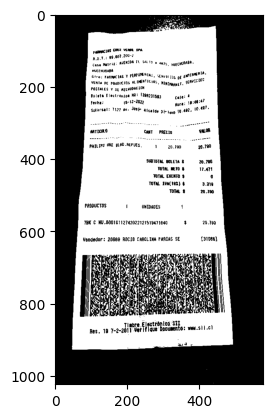

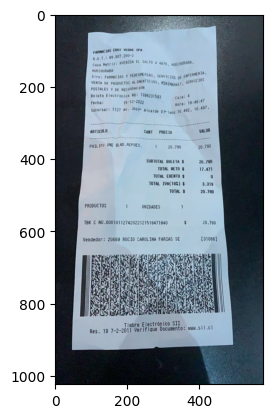

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('./receipts/2.jpg')

# Increase contrast by applying a linear transformation
alpha = 1  # Adjust this value for desired contrast
beta = -50 # Adjust this value for desired brightness
adjusted_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# Convert to grayscale
gray = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2GRAY)

# blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply binary thresholding
_, thresh = cv2.threshold(gray, 160, 220, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')
plt.show()

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area and aspect ratio
filtered_contours = []
for contour in contours:
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    if area > 5000 and 0.5 < aspect_ratio < 2.0:
        filtered_contours.append(contour)

# Draw the largest filtered contour (invoice border) on the original image
if filtered_contours:
    largest_contour = max(filtered_contours, key=cv2.contourArea)
    cv2.drawContours(img, [largest_contour], -1, (0, 255, 0), 2)

# Display the image with the detected border
plt.imshow(img)
plt.show()
